In [1]:
%load_ext autoreload
%autoreload 2

import builtins
import IPython.lib.deepreload
builtins.reload = IPython.lib.deepreload.reload # type: ignore

In [60]:
import math

import matplotlib.pyplot as plt
import numpy as np
import scipy.sparse as sp
from sklearn.cluster import SpectralClustering
import swcgeom
from swcgeom.analysis import draw
from swcgeom.utils import palette

In [81]:
color_map = {
    0: palette.momo,
    1: palette.mizugaki,
    2: palette.kuchiba,
    3: palette.sumire,
    4: palette.aotake,
    5: palette.tsuyukusa,
    6: palette.kimirucha,
    7: palette.benikeshinezumi,
}

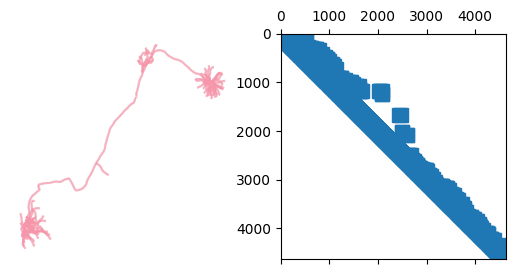

In [117]:
swc1 = "101711-10_4p5-of-16_initial.CNG.swc"
swc2 = "101711-11_16-of-16_initial.CNG.swc"

tree = swcgeom.Tree.from_swc(swc)
tree_adjacency_matrix = tree.get_adjacency_matrix()

fig, (ax0, ax1) = plt.subplots(1, 2)
_ = draw(tree, ax=ax0)
_ = ax1.spy(tree_adjacency_matrix)

In [107]:
branch_tree = swcgeom.BranchTree.from_tree(tree)
branch_tree_adjacency_matrix = branch_tree.get_adjacency_matrix()

/home/celeste/src/swcgeom/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:233: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)


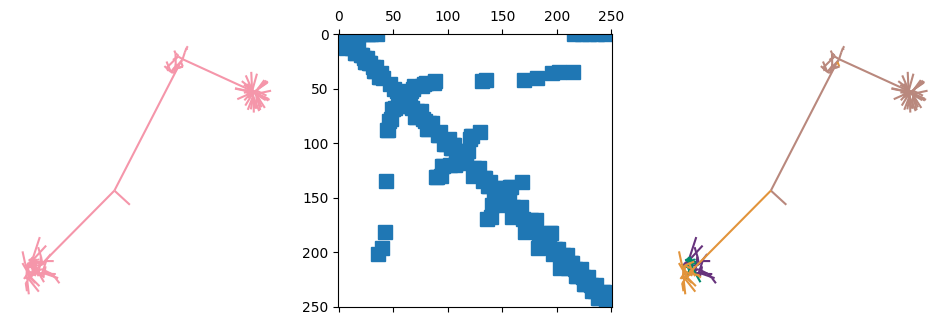

In [127]:
cluster = SpectralClustering(n_clusters=4, affinity='precomputed')
y_pred = cluster.fit_predict(branch_tree_adjacency_matrix)

new_tree = branch_tree.copy()
new_tree.ndata["type"] = y_pred + 1

fig, (ax0, ax1, ax2) = plt.subplots(1, 3)
fig.set_size_inches((12, 10))
_ = draw(branch_tree, ax=ax0)
_ = ax1.spy(branch_tree_adjacency_matrix)
_ = draw(new_tree, ax=ax2, color=color_map)

In [109]:
def get_adjacency_matrix(tree) -> sp.coo_matrix:
    n_nodes = len(tree)
    row, col = tree.pid()[1:], tree.id()[1:]  # ignore root

    def euclidean_distance(pid, id):
        n1 = swcgeom.Tree.Node(tree, pid)
        n2 = swcgeom.Tree.Node(tree, id)
        return math.sqrt(
            math.pow(n1.x - n2.x, 2) +
            math.pow(n1.y - n2.y, 2) +
            math.pow(n1.z - n2.z, 2))

    data = [euclidean_distance(pid, id) for pid, id in zip(row, col)]
    triad = (data, (row, col))
    return sp.coo_matrix(triad, shape=(n_nodes, n_nodes), dtype=np.int32)

euclidean_distance_adjacency = get_adjacency_matrix(branch_tree)

/home/celeste/src/swcgeom/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:233: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)


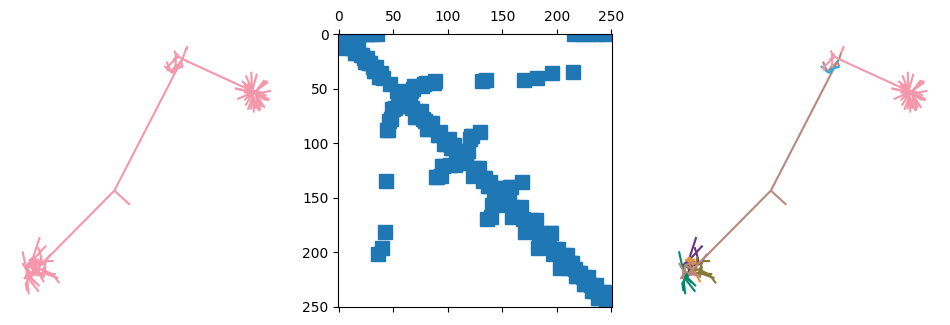

In [123]:
cluster = SpectralClustering(n_clusters=8, affinity='precomputed')
y_pred = cluster.fit_predict(branch_tree_adjacency_matrix)

new_tree = branch_tree.copy()
new_tree.ndata["type"] = y_pred

fig, (ax0, ax1, ax2) = plt.subplots(1, 3)
fig.set_size_inches((12, 10))
_ = draw(branch_tree, ax=ax0)
_ = ax1.spy(euclidean_distance_adjacency)
_ = draw(new_tree, ax=ax2, color=color_map)